# Linear regression

In [1]:
# import necessary libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
rng = np.random

Training done!
Training cost= 2.2402492 W= 1.6078323 b= 1.0582154 



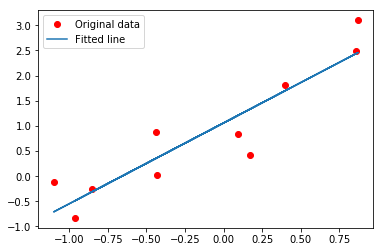

In [2]:
# Data
X_train = np.asarray([0.86, 0.09, -0.85, 0.87, -0.44, -0.43, -1.10, 0.40, -0.96, 0.17])
Y_train = np.asarray([2.49, 0.83, -0.25, 3.10, 0.87, 0.02, -0.12, 1.81, -0.83, 0.43])

# Be sure that the vector are not in the form (n,)
X_train = X_train.reshape(X_train.shape[0], 1)
Y_train = Y_train.reshape(Y_train.shape[0], 1)

# Parameters
learning_rate = 0.05
epochs = 10

# Clean the default grap
tf.reset_default_graph()

# tf Graph Input
# define inputs, the data-type is set to float32
x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

b = tf.Variable(rng.randn(), name="bias")
w = tf.Variable(rng.randn(), name="weight")

# Construct a linear model
y_pred = tf.add(tf.multiply(x, w), b)

# Cost function    
cost = tf.reduce_sum((y_pred - y) * (y_pred - y))

# Gradient Descent to minimize cost
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Initialize the variables
init = tf.global_variables_initializer()

## create a session and pass in graph g
with tf.Session() as sess:
    
    # Run the initializer
    sess.run(init)
    
    # Input data in dict form
    feed_data = {x:X_train, y:Y_train}
    
    # Training
    for epoch in range(epochs):
        _, last_cost, last_w, last_b = sess.run([optimizer, cost, w, b],
                         feed_dict=feed_data)
    
    print('Training done!')
    
    print("Training cost=", last_cost, "W=", last_w, "b=", last_b, '\n')
    
    # Graphic display
    plt.plot(X_train, Y_train, 'ro', label='Original data')
    plt.plot(X_train, last_w * X_train + last_b, label='Fitted line')
    plt.legend()
    plt.show()
    

Training done!
Training cost= 2.2401588 W= 1.6101694 b= 1.0588137 



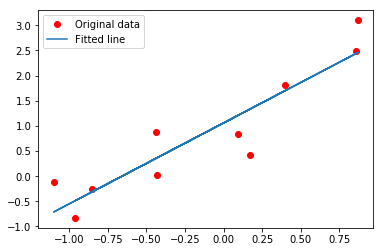

In [3]:
# Data
X_train = np.asarray([0.86, 0.09, -0.85, 0.87, -0.44, -0.43, -1.10, 0.40, -0.96, 0.17])
Y_train = np.asarray([2.49, 0.83, -0.25, 3.10, 0.87, 0.02, -0.12, 1.81, -0.83, 0.43])

# Be sure that the vector are not in the form (n,)
X_train = X_train.reshape(X_train.shape[0], 1)
Y_train = Y_train.reshape(Y_train.shape[0], 1)


# Parameters
learning_rate = 0.05
epochs = 20
logs_path = './tmp/logs/'

# Clean the default grap
tf.reset_default_graph()

# tf Graph Input
# define inputs, the data-type is set to float32
x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

# Set model weights
b = tf.Variable(rng.randn(), name="bias")
w = tf.Variable(rng.randn(), name="weight")



# Construct model and encapsulating all ops into scopes, making
# Tensorboard's Graph visualization more convenient
# Construct a linear model
with tf.name_scope("Model") as scope:
    y_pred = tf.add(tf.multiply(x, w), b)

# Cost function    
with tf.name_scope('Loss'):
    cost = tf.reduce_sum((y_pred - y) * (y_pred - y))

# Gradient Descent to minimize cost
with tf.name_scope("SGD") as scope:
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
    
# Initialize the variables
init = tf.global_variables_initializer()

# Create summaries
tf.summary.scalar("loss", cost)
tf.summary.scalar("bias", b)
tf.summary.scalar("weight", w)

# Merge all summaries into a single op
merged_summary_op = tf.summary.merge_all()
    
## Start training
with tf.Session() as sess:
    
    # Run the initializer
    sess.run(init)
    
    # op to write logs to Tensorboard
    writer = tf.summary.FileWriter( logs_path, graph=tf.get_default_graph())
    
    # Input data in dict form
    feed_data = {x:X_train, y:Y_train}
    
    # Training
    for epoch in range(epochs):
        
        # Run optimization
        _, last_cost, last_w, last_b, summary = sess.run([optimizer, cost, w, b, merged_summary_op],
                         feed_dict=feed_data)

               
        # Write logs
        writer.add_summary(summary, epoch)
    
    # Clean writer
    writer.flush()
    writer.close()
    print('Training done!')
    
    # Print results
    print("Training cost=", last_cost, "W=", last_w, "b=", last_b, '\n')
    

    # Graphic display
    plt.plot(X_train, Y_train, 'ro', label='Original data')
    plt.plot(X_train, last_w * X_train + last_b, label='Fitted line')
    plt.legend()
    plt.show()